In [2]:
from pandas_datareader import data as pdr

In [3]:
import yfinance as yf

In [4]:
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

print(sec.head(10))
print(sec.index)
print(sec.columns)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2018-05-04  53000.0  53900.0  51800.0  51900.0  46826.652344  39565391
2018-05-08  52600.0  53200.0  51900.0  52600.0  47458.222656  23104720
2018-05-09  52600.0  52800.0  50900.0  50900.0  45924.394531  16128305
2018-05-10  51700.0  51700.0  50600.0  51600.0  46555.972656  13905263
2018-05-11  52000.0  52200.0  51200.0  51300.0  46285.292969  10314997
2018-05-14  51000.0  51100.0  49900.0  50100.0  45202.601562  14909272
2018-05-15  50200.0  50400.0  49100.0  49200.0  44390.578125  18709146
2018-05-16  49200.0  50200.0  49150.0  49850.0  44977.039062  15918683
2018-05-17  50300.0  50500.0  49400.0  49400.0  44571.035156  10365440
2018-05-18  49900.0  49900.0  49350.0  49500.0  44661.246094   6706570
DatetimeIn

In [5]:
import matplotlib.pyplot as plt

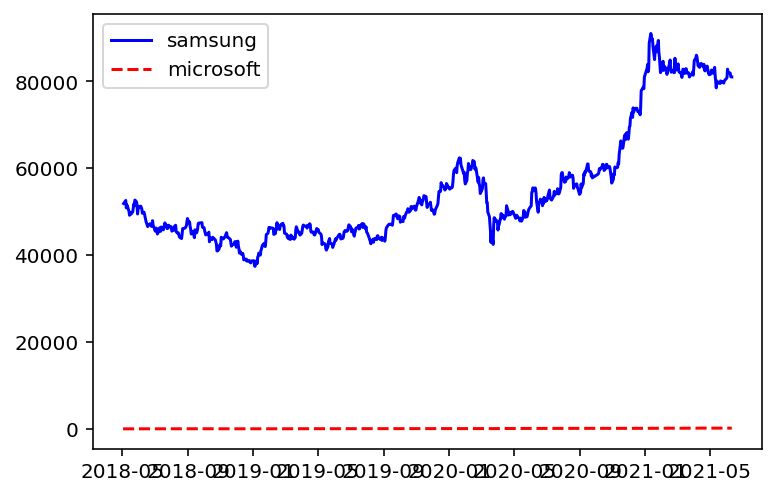

<class 'pandas.core.series.Series'>


In [6]:
plt.plot(sec.index, sec.Close, 'b', label="samsung")
plt.plot(msft.index, msft.Close, 'r--', label="microsoft")
plt.legend(loc="best")
plt.show()

print(type(sec['Close']))




In [7]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2021-06-07    81900.0
2021-06-08    81900.0
2021-06-09    81100.0
2021-06-10    81000.0
2021-06-11    81000.0
Name: Close, Length: 762, dtype: float64

In [8]:
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2021-06-07    82200.0
2021-06-08    81900.0
2021-06-09    81900.0
2021-06-10    81100.0
2021-06-11    81000.0
Name: Close, Length: 762, dtype: float64

In [12]:
# 일간 변동률 구하기

sec_dpc = (sec['Close'] / sec['Close'].shift(1) -1) * 100
sec_dpc.iloc[0] = 0 # 첫번째 일간 변동률의 값이 NaN 이기 때문에 향후 계산을 위해 0으로 변경 (인티저 로케이션 인덱서를 사용)
sec_dpc.head()


Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [13]:
# 히스토그램은 도수 분포를 나타내는 그래프로서 데이터값들에 대한 구간별 빈도수를 막대 형태로 나타낸다
# 이때 구간 수를 빈스라고 한다. hist()함수에서 사용되는 빈스의 기본값은 10이다.
# 삼성 전자 주식 종가의 일간 변동률을 히스토그램으로 출력해보자!

In [14]:
import matplotlib.pyplot as plt

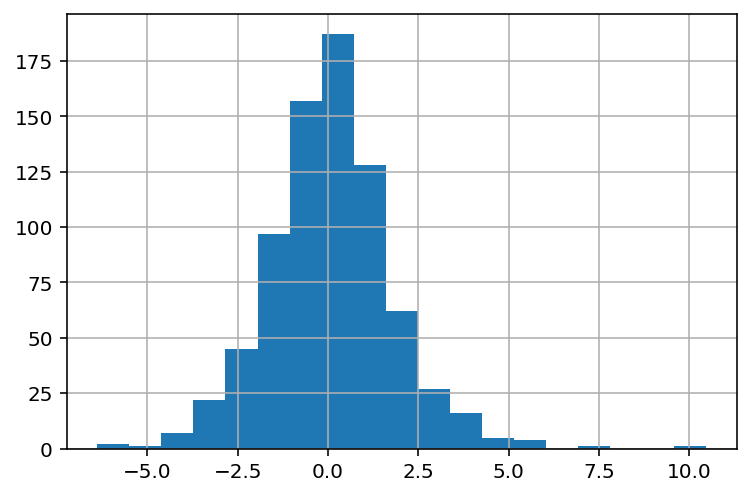

In [15]:
sec_dpc = (sec['Close'] - sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0
plt.hist(sec_dpc, bins=19)
plt.grid(True)
plt.show()

In [17]:
sec_dpc.describe()  # 시리즈의 describe를 이용하면 평균과 표준 편차를 확인 할 수 있다.

count    762.000000
mean       0.073202
std        1.723843
min       -6.387665
25%       -0.975731
50%        0.000000
75%        1.021714
max       10.470588
Name: Close, dtype: float64

In [18]:
from pandas_datareader import data as pdr

In [20]:
import yfinance as yf

In [21]:
yf.pdr_override()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


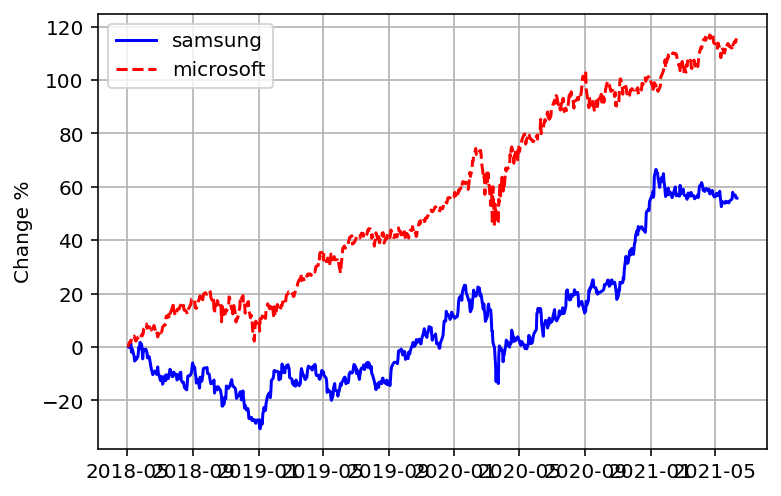

In [23]:
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0
sec_dpc_cs = sec_dpc.cumsum()   # 일간 변동률의 누적합을 구한다

msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')
msft_dpc = (msft['Close'] / msft['Close'].shift(1) -1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

import matplotlib.pyplot as plt

plt.plot(sec.index, sec_dpc_cs, 'b', label="samsung")
plt.plot(msft.index, msft_dpc_cs, 'r--' , label="microsoft")
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc="best")
plt.show()

## 최대손실낙폭

MDD : maximum drawdown 최대 손실 낙폭
최대 손실 낙폭은 특정 기간에 발생한 최고점에서 최저점 까지의 가장큰 손실을 의미한다.
퀀트 투자에서는 수익률을 높이는 것 보다 MDD를 낮추는 것이 낫다고 할만클 중요한 지표이다.
특정 기간 동안 최대한 얼마의 손실이 날 수 있는 지를 나타낸다.

$$MDD = {최저점 - 최고점 \over 최저점} $$


[*********************100%***********************]  1 of 1 completed


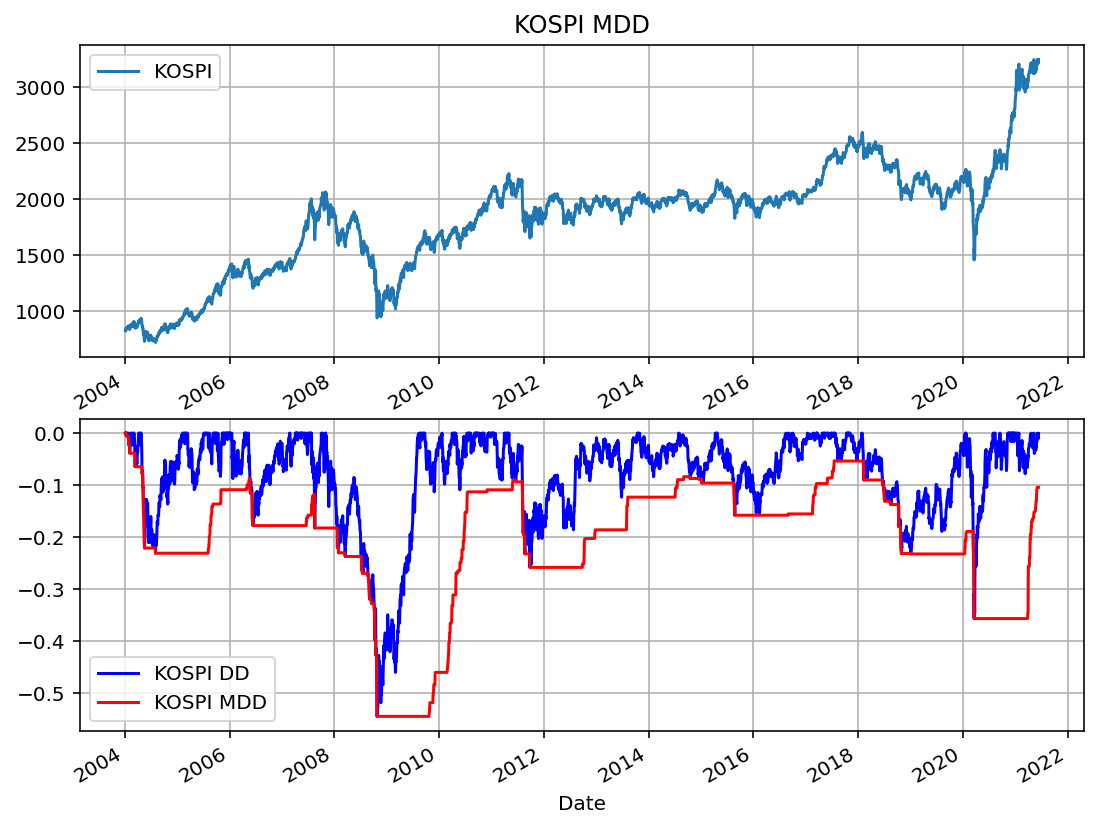

In [3]:
# 코스피의 MDD구하기
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window = 252 # 산정기간에 해당하는 윈도우 값은 1년 동안의 개장일을 어림잡아 설정
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close'] / peak - 1.0 # 최고치 대비 현재 kospi종가가 얼마나 하락 했는지를 구한다.
max_dd = drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9,7))
plt.subplot(211) # 2행 1열 중 1행에 그린다.
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)  # 2행 1열중 2행에 그린다.
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

In [26]:
max_dd.min()

-0.5453665130144085

In [27]:
max_dd[max_dd==-0.5453665130144085]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

In [28]:
# 회귀분석은 데이터의 상관관계를 분석하는데 쓰이는 통계분석 방법이다.
# 회귀분석은 데이터의 모형을 설정한 후 실제로 관측된 표본을 대상으로 회귀모형의 계수를 추정한다.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


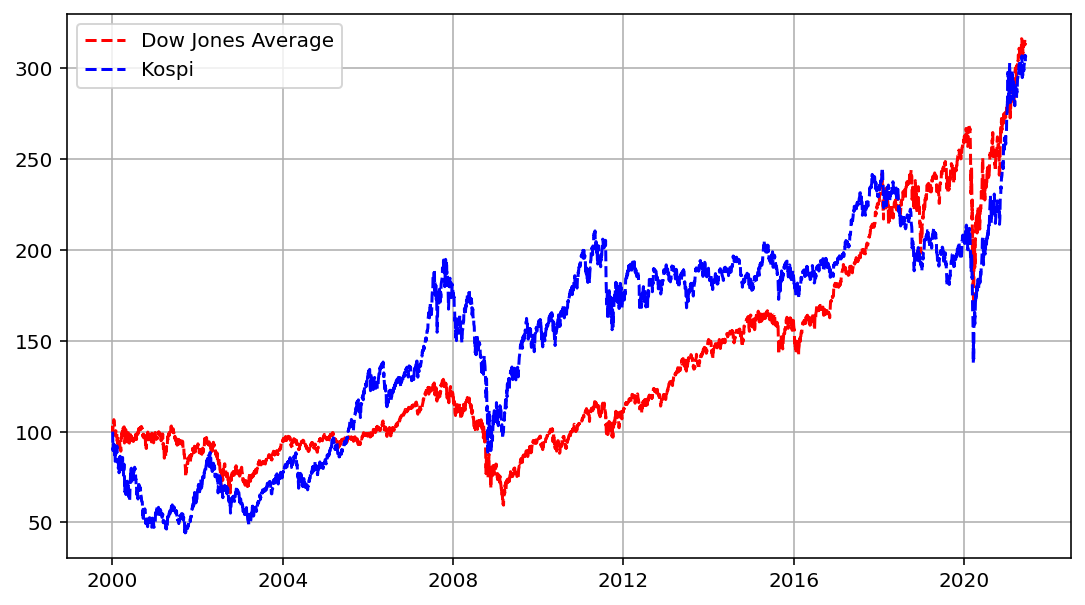

In [4]:
# kospi지수와 다우존스 지수 비교

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

# 지수화 비교 현재 종가를 특정 시점의 종가로 나누어 변동률을 계산한후 표시
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r--', label='Dow Jones Average')
plt.plot(k.index, k, 'b--', label='Kospi')
plt.grid(True)
plt.legend(loc='best')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


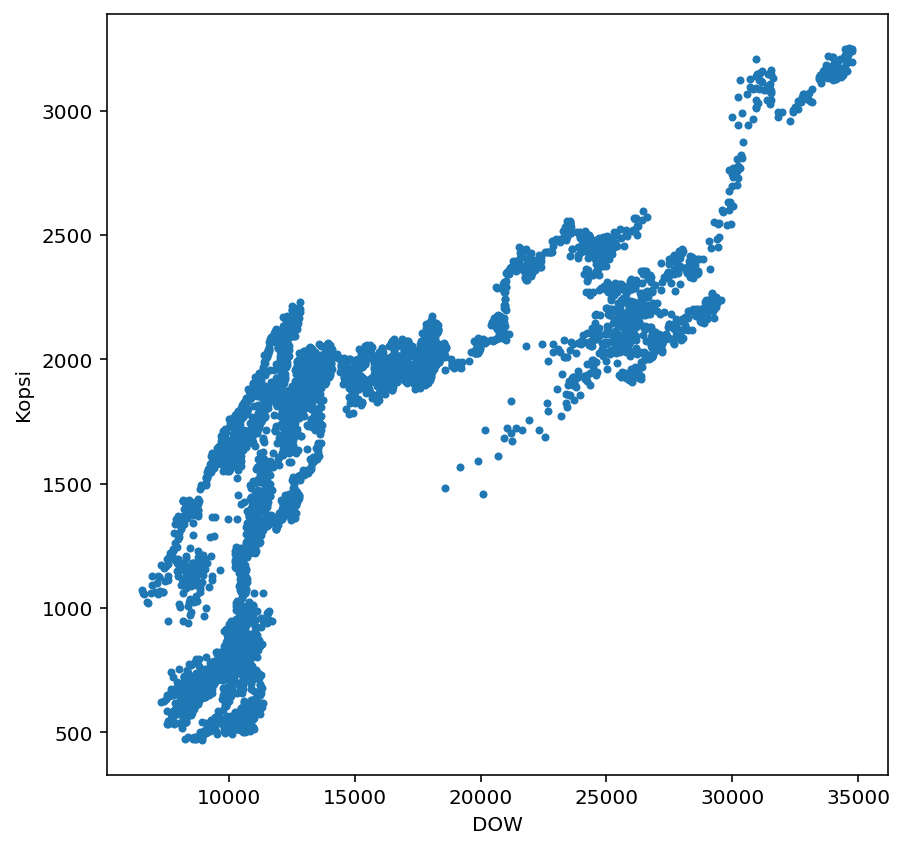

In [5]:
# 다우존스 지수와 kospi산점도 분석

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('DOW')
plt.ylabel('Kopsi')
plt.show()

In [ ]:
# scipy 사용하기 
# scipy 는 파이썬 기반 수학, 과학, 엔지니어링용 핵심 패키지 모음
# 사이파이는 넘파이 기반의 함수들과 수학적 알고리즘의 모음

In [ ]:
# 선형 회귀분석
# 회귀모델이란 연속적인 데이터 Y와 이 Y의 원인이 되는 X간의 관계를 추정하는 관계식을 의미한다.
# 실제로 데이터 값에는 측정 상의 한계로 잡음이 존재 하기 때문에 정확한 관계식을 표현하는 확률 변수인 오차항을 두게됨

In [6]:
from scipy import stats

regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.07830703462259705, intercept=439.32297789246036, rvalue=0.7903101890844264, pvalue=0.0, stderr=0.0008144696098773829, intercept_stderr=13.261716151226839)

In [7]:
# 데이터 프레임으로 상관계수 구하기
df.corr()

,DOW,KOSPI
DOW,1.00000,0.79031
KOSPI,0.79031,1.00000


In [8]:
# 시리즈로 상관계수 구하기
df['DOW'].corr(df['KOSPI'])

0.7903101890844265